<a href="https://colab.research.google.com/github/somewhereverywhere/ML/blob/main/Sixth_module_capstone_project_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Book Recommendation System**    



###Github link



# **Project Summary -**

Book recommendation systems are essential tools for helping readers find new books that match their interests. In this project, we delve into the creation of a book recommendation system by leveraging two widely-used approaches: Popularity-Based Recommendations and Collaborative Filtering. By harnessing the capabilities of Machine Learning, this system aims to deliver personalized book suggestions tailored to each user's unique preferences.

### Import Libraries

In [ ]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
from tabulate import tabulate


# Mount your Google Drive
drive.mount('/content/drive')

# After mounting, you can access your files
file_path1 = '/content/drive/My Drive/Books.csv'
file_path2 = '/content/drive/My Drive/Ratings.csv'
file_path3 = '/content/drive/My Drive/Users.csv'

# Read the file into a Pandas DataFrame

df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)
df3 = pd.read_csv(file_path3)


Mounted at /content/drive


<ipython-input-1-302d785f0efc>:20: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file_path1)


### Dataset First View

In [ ]:
df1.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


In [ ]:
# Dataset First Look
df2.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
df3.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Dataset Rows & Columns count

In [ ]:
num_rows1, num_columns1 = df1.shape
print(f'The dataset books has {num_rows1} rows and {num_columns1} columns.')


The dataset books has 271360 rows and 8 columns.


In [ ]:
num_rows2, num_columns2 = df2.shape
print(f'The dataset ratings has {num_rows2} rows and {num_columns2} columns.')


The dataset ratings has 1149780 rows and 3 columns.


In [ ]:
num_rows3, num_columns3 = df3.shape
print(f'The dataset users has {num_rows3} rows and {num_columns3} columns.')


The dataset users has 278858 rows and 3 columns.


### Dataset Information

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


All three datasets were thoroughly examined and found to be free of duplicates and missing values. After careful consideration, the decision was made not to merge the datasets for the EDA. Working with them as separate entities provided greater flexibility, allowing for more targeted analysis and streamlined data processing. This approach also facilitated the use of each dataset independently, depending on the specific requirements of different stages of the project.

###EXPLORATORY DATA ANALYSIS

Let's take a deeper look into the datasets and discover underlying patterns and insights.

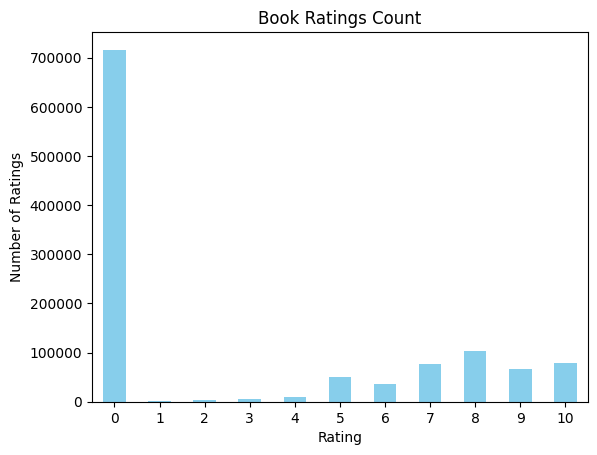

In [ ]:
# Plotting a bar chart for book ratings
df2['Book-Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Book Ratings Count')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)
plt.show()


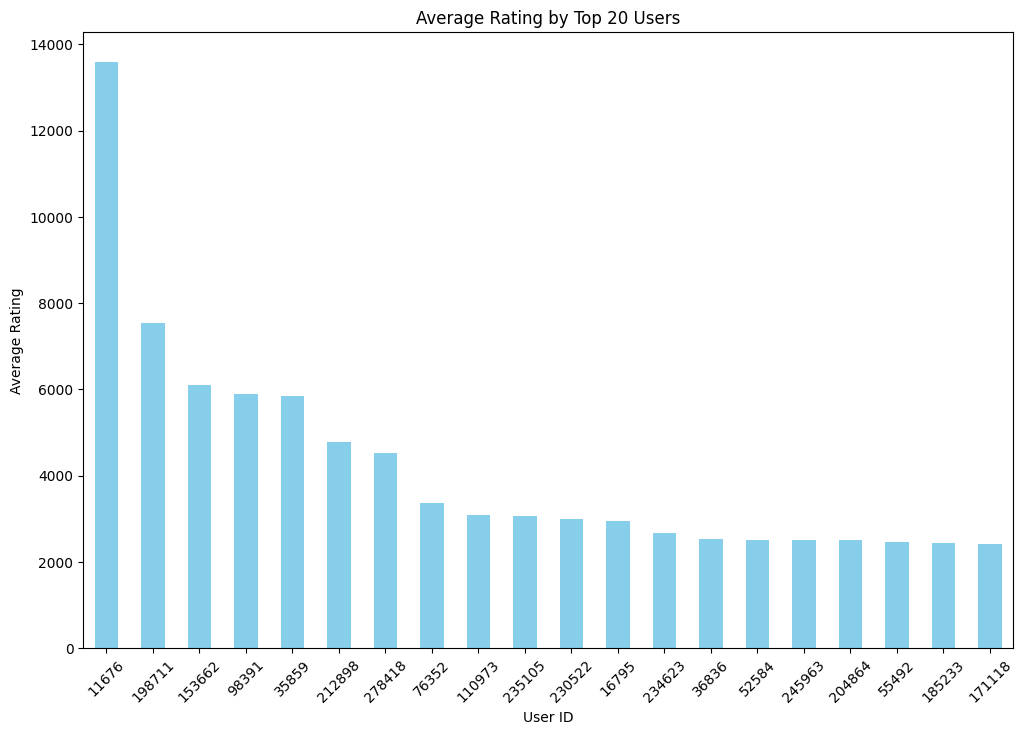

In [ ]:
# Calculate the average rating by user and select the top 20
average_rating_by_user = df2.groupby('User-ID')['Book-Rating'].count().sort_values(ascending=False).head(20)

# Plotting the data
plt.figure(figsize=(12, 8))
average_rating_by_user.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Top 20 Users')
plt.xlabel('User ID')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Total number of unique users in the dataset
total_users = df3['User-ID'].nunique()
# Number of users who have rated at least one book
users_who_rated = df2['User-ID'].nunique()

# Calculate the percentage of users who have rated
percentage_of_users_who_rated = (users_who_rated / total_users) * 100

print(f"Percentage of users who have rated: {percentage_of_users_who_rated:.2f}%")


Percentage of users who have rated: 37.76%


The rest of the users who are not rating books represent a potential area for growth. The platform could focus on strategies to encourage these users to participate more actively, such as through personalized recommendations, rating prompts, or gamification elements that reward users for rating books.

In [ ]:
merged_data = pd.merge(df1, df2, on='ISBN', how='inner')

# Group by 'Book-Title' and count the number of ratings for each title
book_ratings_count = merged_data.groupby('Book-Title')['Book-Rating'].count()

# Sort the counts in descending order and select the top 10
top_10_books = book_ratings_count.sort_values(ascending=False).head(10)


# Convert the Series to a list of tuples
top_10_books_list = list(zip(top_10_books.index, top_10_books.values))

# Define headers
headers = ['Book-Title', 'Number of Ratings']

# Print the table with borders
print(tabulate(top_10_books_list, headers=headers, tablefmt="grid"))


+-------------------------------------------------+---------------------+
| Book-Title                                      |   Number of Ratings |
+=================================================+=====================+
| Wild Animus                                     |                2502 |
+-------------------------------------------------+---------------------+
| The Lovely Bones: A Novel                       |                1295 |
+-------------------------------------------------+---------------------+
| The Da Vinci Code                               |                 898 |
+-------------------------------------------------+---------------------+
| A Painted House                                 |                 838 |
+-------------------------------------------------+---------------------+
| The Nanny Diaries: A Novel                      |                 828 |
+-------------------------------------------------+---------------------+
| Bridget Jones's Diary               

The top-rated books span various genres, from mystery and thriller ("The Da Vinci Code") to literary fiction ("The Lovely Bones") and contemporary fiction ("The Nanny Diaries"). This indicates that readers of different tastes and preferences were actively engaging with these titles.

In [ ]:
merged_data = pd.merge(df1[['ISBN', 'Book-Author']], df2[['ISBN', 'Book-Rating']], on='ISBN', how='inner')

# Group by 'Book-Author' and count the number of ratings
author_ratings_count = merged_data.groupby('Book-Author')['Book-Rating'].count().sort_values(ascending=False)

# Find the most rated author
most_rated_author = author_ratings_count.idxmax()
most_rated_author_count = author_ratings_count.max()

print(f"The most rated author is {most_rated_author} with {most_rated_author_count} ratings.")


The most rated author is Stephen King with 10053 ratings.


In [ ]:
print('Unique values in Age column:', df3['Age'].unique())


Unique values in Age column: [ nan  18.  17.  61.  26.  14.  25.  19.  46.  55.  32.  24.  20.  34.
  23.  51.  31.  21.  44.  30.  57.  43.  37.  41.  54.  42.  50.  39.
  53.  47.  36.  28.  35.  13.  58.  49.  38.  45.  62.  63.  27.  33.
  29.  66.  40.  15.  60.   0.  79.  22.  16.  65.  59.  48.  72.  56.
  67.   1.  80.  52.  69.  71.  73.  78.   9.  64. 103. 104.  12.  74.
  75. 231.   3.  76.  83.  68. 119.  11.  77.   2.  70.  93.   8.   7.
   4.  81. 114. 230. 239.  10.   5. 148. 151.   6. 101. 201.  96.  84.
  82.  90. 123. 244. 133.  91. 128.  94.  85. 141. 110.  97. 219.  86.
 124.  92. 175. 172. 209. 212. 237.  87. 162. 100. 156. 136.  95.  89.
 106.  99. 108. 210.  88. 199. 147. 168. 132. 159. 186. 152. 102. 116.
 200. 115. 226. 137. 207. 229. 138. 109. 105. 228. 183. 204.  98. 223.
 113. 208. 107. 157. 111. 146. 118. 220. 143. 140. 189. 127.]


There are several unrealistic ages in the dataset. Since it's not feasible to manually correct these entries, we'll exclude any ages above 100 from our analysis.








<ipython-input-17-e3ff549baccb>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_count_by_age_group = merged_df.groupby('Age-Group')['Book-Rating'].count()


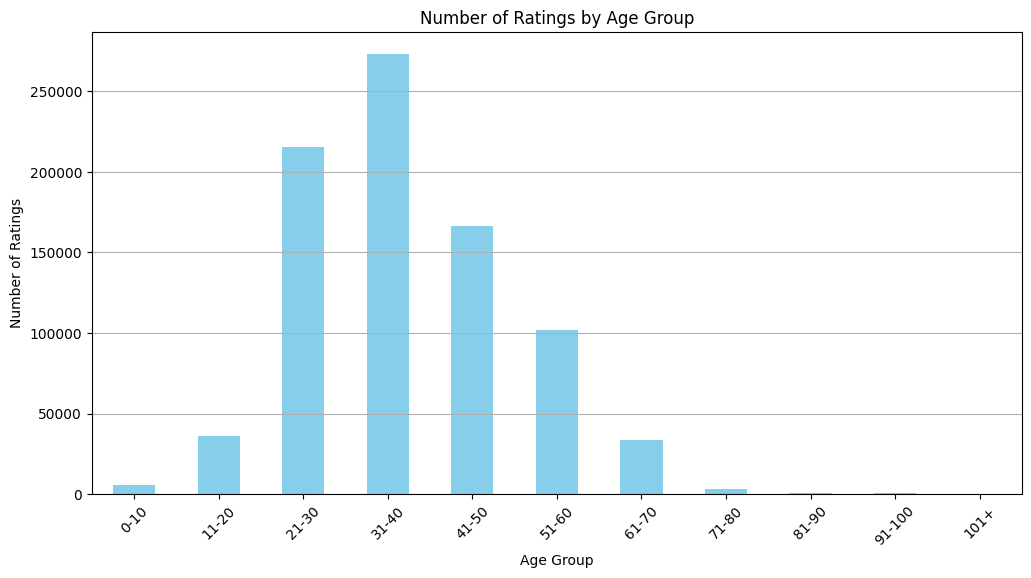

In [ ]:
df3 = df3[df3['Age'] <= 100]

merged_df = pd.merge(df2[['User-ID', 'Book-Rating']], df3[['User-ID', 'Age']], on='User-ID', how='inner')

# Define age bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101+']

# Create a new column 'Age-Group' with these bins
merged_df['Age-Group'] = pd.cut(merged_df['Age'], bins=bins, labels=labels, right=False)

# Count the number of ratings per age group
rating_count_by_age_group = merged_df.groupby('Age-Group')['Book-Rating'].count()

# Create a bar graph
plt.figure(figsize=(12, 6))
rating_count_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Number of Ratings by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



Middle-aged individuals are the most active in rating books, followed by young adults. After that, people aged 40-50 are more engaged, with those in the 50-60 age group showing the least activity in book ratings. This pattern suggests that middle-aged and younger adults are more likely to engage in book rating activities compared to older age groups.

###MODEL CREATION

**Preprocessing**

Preprocessing is a crucial step in any machine learning project. It involves cleaning and organizing the data to make it suitable for analysis and model training.

**Filtering Data**

User Filtering: filter the users to include only those who have rated a sufficient number of books (users who have rated more than 200 books). This ensures that the model is trained on users who have shown enough engagement, leading to more reliable recommendations.

Book Filtering:filter books to include only those that have been rated by a significant number of users (books with ratings from at least 50 users).This prevents the model from making recommendations based on books with very few ratings, which might not be representative of the general preference.

**Merging Datasets**

datasets for users, books, and ratings are separate,  merge them on common identifiers (like ISBN or User-ID). This step ensures that all relevant information (e.g., user demographics, book details, and ratings) is combined into a single dataset, making it easier to analyze and train the model.


**Handling Missing Values**

Missing data can skew the results of your model. During preprocessing, you might need to handle missing values, either by filling them with appropriate values (like the mean or median) or by removing rows/columns with excessive missing data.


In [ ]:
# Merging rating and book dataframes
rating_with_name = df2.merge(df1, on='ISBN')

# Calculating the number of ratings and average rating for each book
num_rating_df = rating_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating': 'Num_rating'}, inplace=True)

avg_rating_df = rating_with_name.groupby('Book-Title').mean(numeric_only=True)['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'Avg_rating'}, inplace=True)

# Merging popularity dataframes and filtering top 100 popular books
popular_df = num_rating_df.merge(avg_rating_df, on='Book-Title')
pbr_df = popular_df[popular_df['Num_rating'] >= 300].sort_values('Avg_rating', ascending=False).head(100)

# Selecting relevant columns for recommendation
pbr_df = pbr_df.merge(df1, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 'Publisher', 'Image-URL-M', 'Num_rating', 'Avg_rating']]

# Saving the popularity-based recommendation data into a pickle file
pickle.dump(pbr_df, open('PopularBookRecommendation.pkl', 'wb'))

b = rating_with_name.groupby('User-ID').count()['Book-Rating'] > 200
users_with_ratings = b[b].index
filtered_rating = rating_with_name[rating_with_name['User-ID'].isin(users_with_ratings)]
c = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = c[c].index
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]


###MODEL TRAINING

Once the data is preprocessed, the next step is training the machine learning model.it involves using collaborative filtering, which is a technique commonly used in recommendation systems.

**Popularity-based**

These simply recommend the most popular items to users. Popularity-based systems are simplest of all and have minimal computational requirements.

**Pivot Table Creation**

a pivot table where rows represent Book-Title, columns represent User-ID, and the values are the Book-Rating was created. This table forms the basis of the model, representing the relationship between users and the books they have rated.

**Cosine Similarity Calculation**

Unsupervised Learning

 Unlike supervised learning, where you have labeled data, collaborative filtering often uses unsupervised learning.The cosine similarity between the rows of the pivot table (i.e., between different books)was calculated. Cosine similarity measures the cosine of the angle between two vectors—here,the vectors represent the ratings of different books by users. The closer the cosine similarity value is to 1, the more similar the two books are.

**Learning Patterns**

The model "learns" the patterns in user ratings by calculating these similarities. It identifies which books tend to be rated similarly by users, even if the specific ratings differ. This step doesn't involve traditional "training" like a neural network but is instead about discovering patterns in the data that can be used for recommendations.


In [ ]:

#Pivot Table Creation
pt = final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')
pt.fillna(0, inplace=True)

#Cosine Similarity Calculation
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(pt)
import numpy as np
#Recommendation Function
def recommendation(book_name):
    if book_name not in pt.index:
        return "Book not found."

    index = np.where(np.array(list(pt.index)) == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), reverse=True, key=lambda x: x[1])[1:9]

    data = []
    for i in similar_items:
        book_title = pt.index[i[0]]
        temp_df = df1[df1['Book-Title'] == book_title].iloc[0]
        item = [temp_df['Book-Title'], temp_df['Book-Author'], temp_df['Image-URL-M']]
        data.append(item)
    return data

#Saving Data
pickle.dump(pt, open('pt.pkl', 'wb'))
pickle.dump(df1, open('book.pkl', 'wb'))
pickle.dump(similarity_scores, open('similarity_scores.pkl', 'wb'))





####MODEL INFERENCE

Inference is the step where the trained model is applied to make predictions or recommendations.

**Using Similarity Scores**

After calculating the similarity scores during the training phase, these scores are used to recommend books. When a user inputs a book they like, the system retrieves the similarity scores for that book and identifies other books with high similarity scores.

**Recommendation Generation**

For each book a user is interested in, the model ranks other books based on their similarity scores and recommends those with the highest scores. The assumption is that if two books are similar based on user ratings, a user who likes one book will likely enjoy the other.

**Personalized Recommendations**

The recommendations are personalized because they are based on the specific books a user has shown interest in. The system takes into account the patterns it learned during the training phase (i.e., which books are rated similarly by the same users) to provide these recommendations.

In [ ]:
recommendation('The Notebook')

[['A Walk to Remember',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446608955.01.MZZZZZZZ.jpg'],
 ['The Rescue',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446610399.01.MZZZZZZZ.jpg'],
 ['One Door Away from Heaven',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/0553582755.01.MZZZZZZZ.jpg'],
 ['Toxin',
  'Robin Cook',
  'http://images.amazon.com/images/P/0425166619.01.MZZZZZZZ.jpg'],
 ['The Five People You Meet in Heaven',
  'Mitch Albom',
  'http://images.amazon.com/images/P/0786868716.01.MZZZZZZZ.jpg'],
 ['Nights in Rodanthe',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446531332.01.MZZZZZZZ.jpg'],
 ["Suzanne's Diary for Nicholas",
  'James Patterson',
  'http://images.amazon.com/images/P/0316969443.01.MZZZZZZZ.jpg'],
 ["Everything's Eventual : 14 Dark Tales",
  'Stephen King',
  'http://images.amazon.com/images/P/0743457358.01.MZZZZZZZ.jpg']]

Collaborative filtering evaluates user interactions and suggests books based on observed user behavior patterns. When using cosine similarity in a recommendation system, the focus is primarily on the similarity of user ratings rather than on the genre of the books. This approach measures how closely the ratings given by users match each other. As a result, books that receive similar ratings from users will be recommended, even if they belong to different genres. This method relies on the patterns of ratings and preferences rather than the content attributes of the books themselves.

To improve the recommendation system, it is beneficial to incorporate content-based features like genre, author, or book descriptions for more personalized recommendations. However, since the current dataset lacks a genre column, we relayed solely on user ratings to generate recommendations.

####CONCLUSION

In this project,i developed a book recommendation system using collaborative filtering techniques, specifically focusing on cosine similarity. This approach leverages user ratings to suggest books based on the similarity of user preferences, without considering the genre or other content-based features.

Deploying the system using Flask makes it easily accessible to users, allowing them to discover exciting new books that align with their interests.

For a book retailer or a digital library, effective recommendations can significantly enhance user engagement and satisfaction. By providing personalized book suggestions, businesses can increase customer retention, drive sales, and improve the overall user experience. Collaborative filtering helps in achieving these goals by identifying patterns in user behavior and recommending books that are highly rated by similar users.